In [6]:
import jax
import jax.numpy as jnp
import jax.random as jr

import hugegp as gp

import matplotlib.pyplot as plt

key = jr.key(13)

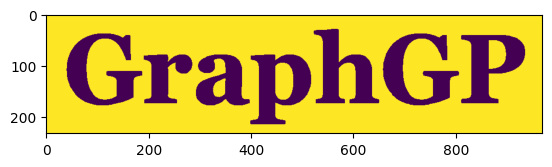

In [19]:
img = plt.imread("/mnt/c/Users/dodge/Downloads/graphgp.png")
plt.imshow(img[...,0] == 1)
plt.show()

In [20]:
coords = jnp.array(jnp.meshgrid(
    jnp.arange(img.shape[0]),
    jnp.arange(img.shape[1]),
    indexing="ij",
)).reshape(2, -1).T / 100

letter = jnp.flatnonzero(img[...,0] == 0)

points = coords[letter]
points = jnp.roll(points, 1, axis=1)
points = points.at[:, 1].mul(-1)
len(points)

46979

In [21]:
offsets = gp.make_offsets(len(points), 1000, 1.3)
points, neighbors, indices = gp.build_jax_graph(points, offsets=offsets, k=20, cuda=True)
covariance = gp.matern_cov

In [22]:
key, k1 = jr.split(key)
xi = jr.normal(k1, (len(points),))
values = gp.generate(points, neighbors, offsets, covariance, xi)

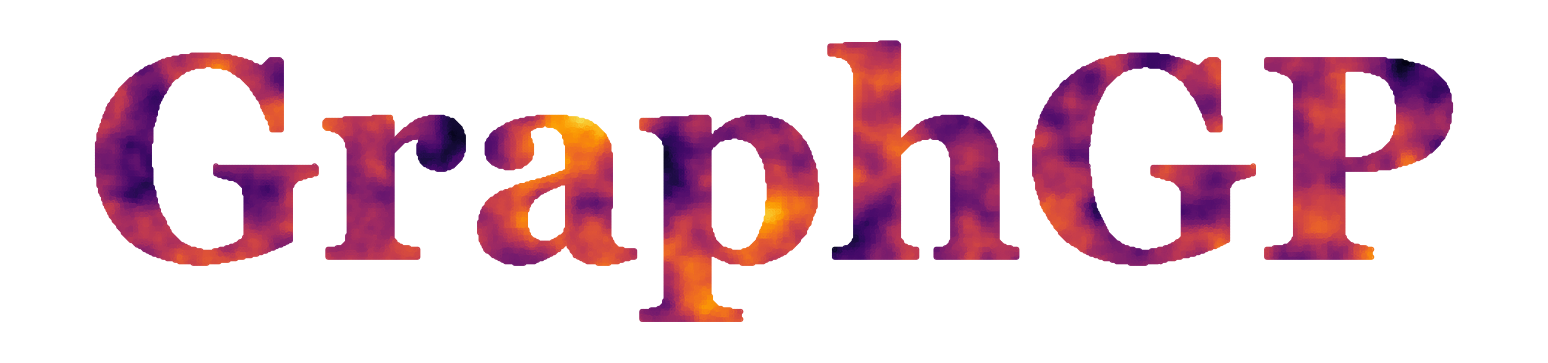

In [25]:
plt.figure(dpi=300)
plt.scatter(*points.T, c=values, s=.1, cmap='inferno', vmin=-3, vmax=4)
plt.gca().set(aspect='equal')
plt.axis('off')
plt.savefig('logo.png', bbox_inches='tight', transparent=True, pad_inches=0, dpi=300)
plt.show()